In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
np.random.seed(12345)

## Cost Function

```
C = (1/n) * Σ(y_i - ŷ_i)², where ŷ_i = intercept + coeff * x_i
```


### Partial Derivative w.r.t. Intercept

```
dC/dIntercept = (1/n) * Σ 2(y_i - ŷ_i) * d/dIntercept(y_i - ŷ_i)
              = (1/n) * Σ 2(y_i - ŷ_i) * (-1)
              = -(2/n) * Σ(y_i - ŷ_i)
```

### Partial Derivative w.r.t. Coefficient

```
dC/dCoeff = (1/n) * Σ 2(y_i - ŷ_i) * d/dCoeff(y_i - ŷ_i)
          = (1/n) * Σ 2(y_i - ŷ_i) * (-x_i)
          = -(2/n) * Σ(x_i * (y_i - ŷ_i))
```

In [4]:
def cost_function(intercept, coeff, x_train, y_train):

  y_pred = intercept + coeff * x_train

  return np.sum((y_pred - y_train)**2) / len(x_train)

In [5]:
def batch_gradient_descent(intercept, coeff, learning_rate, x, y):

  n = len(x)

  y_pred = intercept + coeff * x

  dC_DIntercept = - 2 * np.sum(y - y_pred) / n
  dC_DCoeff = - 2 * np.sum((y - y_pred)*x) / n

  new_intercept = intercept - learning_rate * dC_DIntercept
  new_coeff = coeff - learning_rate * dC_DCoeff

  return new_intercept, new_coeff

In [141]:
x = np.array([i for i in range(10)])
# y = x*2 + 5
y = x*2 + 5 + [np.random.randint(-2,2) for _ in range(len(x))]

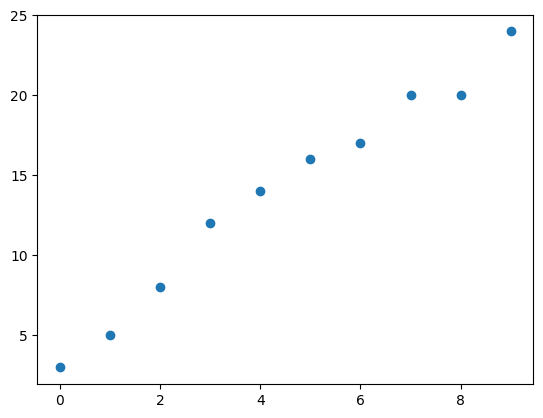

In [142]:
plt.scatter(x,y)

In [143]:
intercept = 0
coeff = 0

learning_rate = 0.01
iterations = 1000

costs = []
variables = []

for iter in range(iterations):

  cost = cost_function(intercept, coeff, x, y)

  variables.append((round(intercept,2), round(coeff,2)))
  costs.append(round(cost,3))

  intercept, coeff = batch_gradient_descent(intercept, coeff, learning_rate, x, y)

  new_cost = cost_function(intercept, coeff, x, y)

  if round(abs(new_cost - cost),4) < 0.0001:
    print(f'Stopping at {iter} iteration')
    best_intercept, best_coeff = intercept, coeff
    break

Stopping at 582 iteration


In [144]:
costs[0], costs[-1]

(np.float64(235.9), np.float64(0.985))

Text(0.5, 1.0, 'Cost function over iterations')

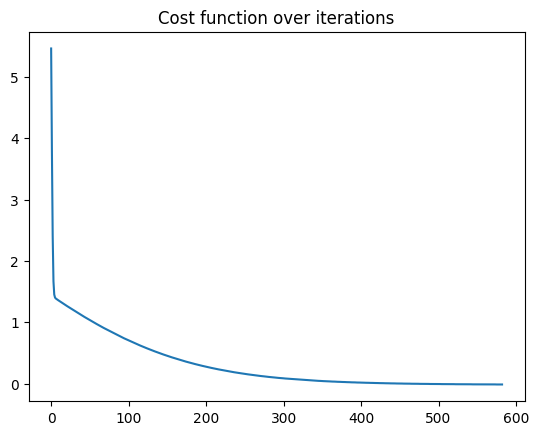

In [151]:
plt.plot(np.log(costs))
plt.title("Cost function over iterations")

In [146]:
best_intercept, best_coeff

(np.float64(3.6588978180867504), np.float64(2.2680875406091827))

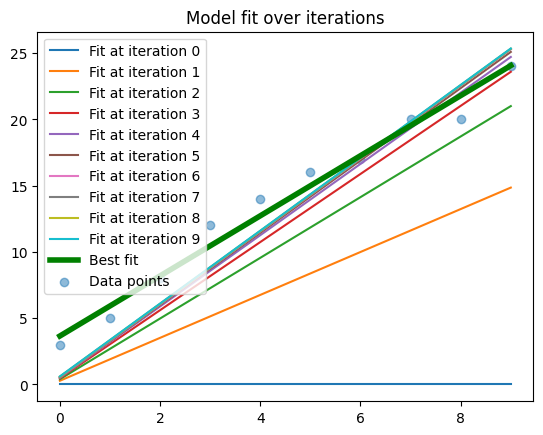

In [164]:
for idx in range(10):

  iter = idx
  interm_intercept, interm_coeff = variables[iter][0], variables[iter][1]
  plt.plot(x, interm_intercept + interm_coeff * x, label=f'Fit at iteration {iter}')

plt.plot(x, best_intercept + best_coeff * x, linewidth=4, label='Best fit',color='green')
plt.scatter(x, y, alpha=0.5, label='Data points')
plt.title('Model fit over iterations')
plt.legend()